In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Load data 

In [2]:
df = pd.read_csv('Full_Employee_Data_feature_engineered.csv')
df

,Age,Attrition,BusinessTravel,DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PromotionLethargy,HighDistanceLowPay,WorkLifeCommuteStrain,OverallHappinessScore
0,49,0,1,22.0,5.0,20627.0,3.0,0,4.0,False,True,False,True,False,False,0.954545,0.001067,5.500000,3.666667
1,50,0,1,8.0,3.0,11947.0,2.0,1,4.0,False,True,False,True,False,False,0.944444,0.000670,2.666667,3.333333
2,32,0,1,21.0,5.0,24026.0,3.0,1,4.0,False,True,False,False,True,False,0.857143,0.000874,7.000000,4.000000
3,38,0,1,8.0,3.0,11140.0,1.0,0,4.0,False,False,True,True,False,False,0.947368,0.000718,2.000000,3.666667
4,28,1,2,27.0,1.0,3034.0,8.0,1,1.0,False,False,True,False,False,True,0.000000,0.008899,27.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249630,30,0,1,14.0,4.0,16144.0,3.0,1,4.0,False,True,False,False,False,True,0.700000,0.000867,3.500000,3.666667
249631,40,0,1,8.0,5.0,21604.0,2.0,0,3.0,False,True,False,False,True,False,0.842105,0.000370,2.000000,3.000000
249632,31,0,1,22.0,3.0,11428.0,2.0,0,3.0,False,True,False,False,True,False,0.909091,0.001925,5.500000,4.000000
249633,33,0,1,1.0,1.0,2836.0,8.0,0,2.0,False,True,False,False,False,True,0.000000,0.000353,1.000000,1.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249635 entries, 0 to 249634
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                249635 non-null  int64  
 1   Attrition                          249635 non-null  int64  
 2   BusinessTravel                     249635 non-null  int64  
 3   DistanceFromHome                   249635 non-null  float64
 4   JobLevel                           249635 non-null  float64
 5   MonthlyIncome                      249635 non-null  float64
 6   NumCompaniesWorked                 249635 non-null  float64
 7   OverTime                           249635 non-null  int64  
 8   PerformanceRating                  249635 non-null  float64
 9   Department_Human Resources         249635 non-null  bool   
 10  Department_Research & Development  249635 non-null  bool   
 11  Department_Sales                   2496

In [4]:
df.duplicated().sum()

1

## EDA

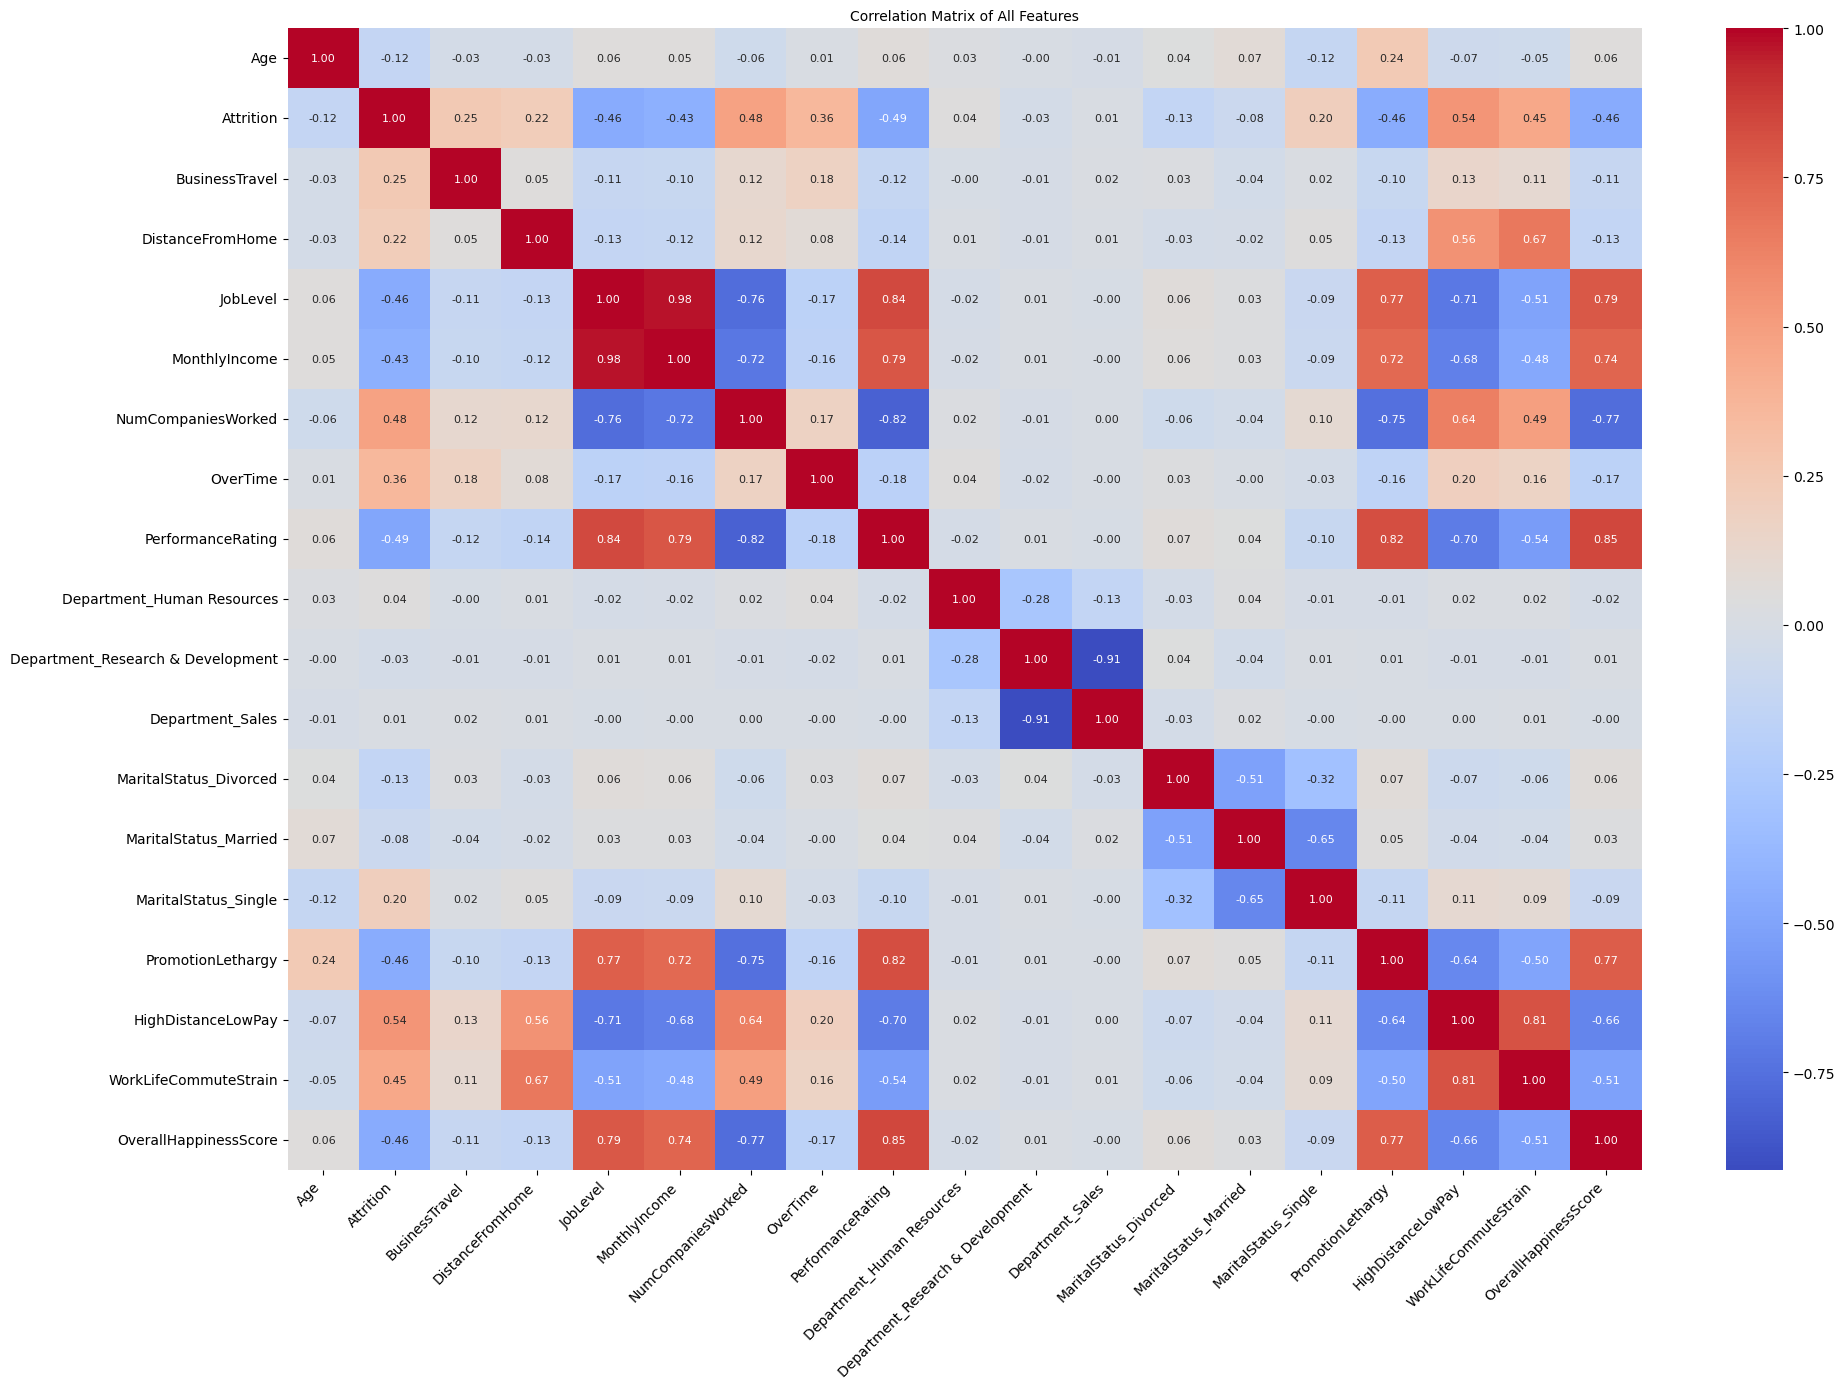

In [5]:
plt.figure(figsize=(20, 14))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            annot_kws={'size': 8}) 
plt.title('Correlation Matrix of All Features', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

### get only the people who left (Attrition = 1)

In [6]:
df_left = df[df['Attrition']==1].copy()

In [7]:
binary_features = [
    col for col in df.columns
    if df[col].dtype == 'bool' or 
       (df[col].dtype == 'int64' and df[col].nunique() <= 2)
]
binary_features

['Attrition',
 'OverTime',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single']

In [8]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DistanceFromHome', 'JobLevel',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PerformanceRating',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'PromotionLethargy', 'HighDistanceLowPay',
       'WorkLifeCommuteStrain', 'OverallHappinessScore'],
      dtype='object')

### Remove some low correlation features to attrition and drop the attrition feature itself

In [9]:
df_left.drop(['Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',] ,axis=1, inplace= True)

df_left.drop('Attrition', axis=1, inplace= True)

In [10]:
df_left

,Age,BusinessTravel,DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PromotionLethargy,HighDistanceLowPay,WorkLifeCommuteStrain,OverallHappinessScore
4,28,2,27.0,1.0,3034.0,8.0,1,1.0,False,False,True,0.00,0.008899,27.00,1.000000
15,28,1,26.0,1.0,2204.0,5.0,1,2.0,False,True,False,0.00,0.011797,26.00,1.333333
19,34,1,11.0,1.0,3032.0,7.0,1,1.0,False,False,True,0.50,0.003628,11.00,1.333333
22,33,1,29.0,1.0,2419.0,6.0,0,2.0,False,False,True,0.00,0.011988,29.00,1.000000
28,34,1,19.0,2.0,4799.0,7.0,0,1.0,False,False,True,0.00,0.003959,19.00,1.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249571,54,2,29.0,1.0,3371.0,7.0,0,1.0,False,False,True,0.00,0.008603,29.00,3.000000
249589,35,2,2.0,2.0,5233.0,4.0,1,1.0,False,True,False,0.25,0.000382,2.00,1.666667
249604,23,2,21.0,2.0,4621.0,4.0,0,2.0,False,False,True,0.00,0.004544,5.25,1.000000
249616,31,1,18.0,1.0,3106.0,5.0,0,2.0,False,False,True,0.50,0.005795,18.00,1.000000


## standarize data

In [11]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df_left)
df_left_preprocessed = pd.DataFrame(scaled_array, columns=df_left.columns)

with open("scaler(clus).pkl", "wb") as f:
    pickle.dump(scaler, f)

df_left_preprocessed

,Age,BusinessTravel,DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PromotionLethargy,HighDistanceLowPay,WorkLifeCommuteStrain,OverallHappinessScore
0,-0.731704,1.348752,1.483945,-0.570168,-0.467894,1.454677,1.011826,-0.786273,-0.269868,-0.819438,0.940964,-0.789701,1.352191,1.734162,-0.880118
1,-0.731704,-0.667899,1.346304,-0.570168,-0.601267,-0.295487,1.011826,0.180337,-0.269868,1.220348,-1.062740,-0.789701,2.283577,1.614600,-0.513747
2,-0.043792,-0.667899,-0.718315,-0.570168,-0.468216,0.871289,1.011826,-0.786273,-0.269868,-0.819438,0.940964,0.850220,-0.342147,-0.178838,-0.513747
3,-0.158444,-0.667899,1.759227,-0.570168,-0.566719,0.287901,-0.988312,0.180337,-0.269868,-0.819438,0.940964,-0.789701,2.345193,1.973287,-0.880118
4,-0.043792,-0.667899,0.382815,0.230354,-0.184277,0.871289,-0.988312,-0.786273,-0.269868,-0.819438,0.940964,-0.789701,-0.235691,0.777662,-0.147376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32064,2.249248,1.348752,1.759227,-0.570168,-0.413742,0.871289,-0.988312,-0.786273,-0.269868,-0.819438,0.940964,-0.789701,1.256932,1.973287,1.318109
32065,0.070860,1.348752,-1.957086,0.230354,-0.114537,-0.878875,1.011826,-0.786273,-0.269868,1.220348,-1.062740,0.030259,-1.385453,-1.254901,-0.147376
32066,-1.304965,1.348752,0.658098,0.230354,-0.212879,-0.878875,-0.988312,0.180337,-0.269868,-0.819438,0.940964,-0.789701,-0.047552,-0.866322,-0.880118
32067,-0.387748,-0.667899,0.245174,-0.570168,-0.456325,-0.295487,-0.988312,0.180337,-0.269868,-0.819438,0.940964,0.850220,0.354487,0.658100,-0.880118


In [12]:
df_left_preprocessed.to_csv('left_employee.csv', index= 0)

## PCA

In [13]:
n_components = 3
pca = PCA(n_components=n_components)
PCA_array = pca.fit_transform(df_left_preprocessed)

In [14]:
with open("pca.pkl", "wb") as f:
    pickle.dump(pca, f)

### Analyzing how new components correlate with the original ones

In [15]:
explained_variance = pca.explained_variance_ratio_
total_variance = explained_variance.sum()
print(f"Total variance explained by both components: {total_variance:.2%}")

Total variance explained by both components: 62.28%


#### correlation between the generated PCA components and the real features this will help us name our components based on the features that affect it the most

In [16]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(n_components)], index=df_left.columns)
# Display the top 5 positive and top 5 negative loadings for each component
print("--- Component Loadings for Naming ---")
for pc in loadings.columns:
    print(f"\n{pc}:")
    # Top 5 positive loadings (highest correlation)
    top_pos = loadings.nlargest(5, pc)[pc]
    print(f"  Top Positive Features:\n{top_pos.to_markdown(numalign='left', stralign='left')}")
    # Top 5 negative loadings (highest inverse correlation)
    top_neg = loadings.nsmallest(5, pc)[pc]
    print(f"  Top Negative Features:\n{top_neg.to_markdown(numalign='left', stralign='left')}")

--- Component Loadings for Naming ---

PC1:
  Top Positive Features:
|                       | PC1      |
|:----------------------|:---------|
| MonthlyIncome         | 0.38836  |
| JobLevel              | 0.387915 |
| PerformanceRating     | 0.365073 |
| OverallHappinessScore | 0.356468 |
| PromotionLethargy     | 0.333109 |
  Top Negative Features:
|                       | PC1        |
|:----------------------|:-----------|
| HighDistanceLowPay    | -0.3313    |
| NumCompaniesWorked    | -0.285903  |
| WorkLifeCommuteStrain | -0.28335   |
| DistanceFromHome      | -0.235751  |
| OverTime              | -0.0038867 |

PC2:
  Top Positive Features:
|                       | PC2         |
|:----------------------|:------------|
| MaritalStatus_Single  | 0.660392    |
| NumCompaniesWorked    | 0.0117997   |
| JobLevel              | -0.00133939 |
| OverallHappinessScore | -0.00152413 |
| PerformanceRating     | -0.00152713 |
  Top Negative Features:
|                        | PC2       |

### make our PCA array a dataframe

In [17]:
df_PCA = pd.DataFrame(PCA_array)


In [18]:
df_PCA

,0,1,2
0,-2.978290,0.831130,1.351455
1,-2.287706,-1.510131,2.061125
2,-0.510354,0.959468,-1.092594
3,-2.782551,1.500026,2.459441
4,-1.063333,1.566025,0.047412
...,...,...,...
32064,-2.091942,0.633891,2.171001
32065,1.239194,-1.834952,-2.420100
32066,-0.147202,1.634392,-0.088310
32067,-0.638130,1.592200,0.553632


## K-means

### Elbow Method to find optimal k (number of clusters for the PCA dataset)

C:\Users\Admin\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Admin\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Admin\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Admin\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

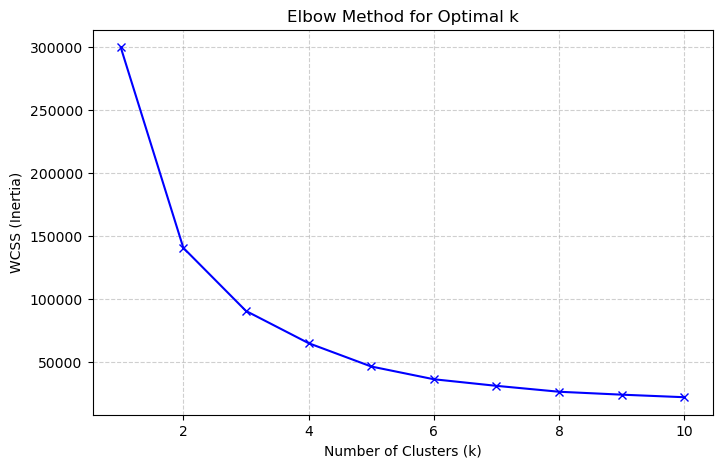

In [19]:
wcss = [KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10).fit(df_PCA).inertia_ for k in range(1, 11)]

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, 'bx-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [20]:
df_left_Kmeans = df_left_preprocessed.copy()

In [21]:
kmeans = KMeans(n_clusters=8, random_state=42, n_init=10)
df_left_Kmeans['Cluster'] = kmeans.fit_predict(df_PCA)

with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)
    
for i in range(n_components):
    df_left_Kmeans[f'PC{i+1}'] = PCA_array[:, i]

#Profile the clusters by the new PCA components
cluster_profile_pca = df_left_Kmeans.groupby('Cluster')[[f'PC{i+1}' for i in range(n_components)]].mean()
print("\n--- Mean PCA Component Scores by Cluster (for interpretation) ---")
print(cluster_profile_pca.to_markdown(numalign='left', stralign='left'))

#Profile the clusters by key original features
key_features = ['MonthlyIncome', 'JobLevel', 'OverallHappinessScore' ,  'PromotionLethargy']
cluster_profile_key_features = df_left_Kmeans.groupby('Cluster')[key_features].mean()
print("\n--- Mean Key Feature Scores by Cluster (for interpretation) ---")
print(cluster_profile_key_features.to_markdown(numalign='left', stralign='left'))



--- Mean PCA Component Scores by Cluster (for interpretation) ---
| Cluster   | PC1        | PC2      | PC3       |
|:----------|:-----------|:---------|:----------|
| 0         | -1.83683   | 1.24     | 1.372     |
| 1         | 4.98431    | -1.48476 | 0.701314  |
| 2         | -0.880065  | -1.44543 | -0.307476 |
| 3         | -0.0247141 | 1.35512  | -1.83459  |
| 4         | -1.83521   | -1.5036  | 1.27209   |
| 5         | -0.890334  | 1.28092  | -0.207681 |
| 6         | -0.0141992 | -1.39851 | -1.94714  |
| 7         | 4.92106    | 1.28295  | 0.762208  |

--- Mean Key Feature Scores by Cluster (for interpretation) ---
| Cluster   | MonthlyIncome   | JobLevel   | OverallHappinessScore   | PromotionLethargy   |
|:----------|:----------------|:-----------|:------------------------|:--------------------|
| 0         | -0.442687       | -0.45693   | -0.383304               | -0.358933           |
| 1         | 2.09201         | 2.0732     | 1.92779                 | 1.87428           

#### Rename our PCA components to more suitable names according to correlation

In [22]:
df_left_Kmeans = df_left_Kmeans.rename(columns={
    'PC1': 'Career Status',
    'PC2': 'High Mobility low obligations',
    'PC3': 'Logistical Burden'
})

In [23]:
print(df_left_Kmeans['Career Status'].median(),
df_left_Kmeans['High Mobility low obligations'].median(),
df_left_Kmeans['Logistical Burden'].median())

-0.7490714381402187 0.5897945064375726 0.2423044776442833


In [24]:
# The mapping dictionary based on the 'Profile Summary' from the previous table
cluster_summary_map = {
    0: 'Low Status, High Mobility, High Burden',
    1: 'Avg Status, Low Mobility, Very Low Burden',
    2: 'Very High Status, High Mobility, High Burden',
    3: 'Very High Status, Low Mobility, High Burden',
    4: 'Low Status, High Mobility, Low Burden',
    5: 'Low Status, Low Mobility, High Burden',
    6: 'Avg Status, High Mobility, Very Low Burden',
    7: 'Low Status, Low Mobility, Low Burden'
}

# Rename the values in the 'Cluster' column using the mapping
df_left_Kmeans['Cluster'] = df_left_Kmeans['Cluster'].replace(cluster_summary_map)

# Display the value counts to confirm the renaming
print(df_left_Kmeans['Cluster'].value_counts())

Cluster
Low Status, Low Mobility, High Burden           5674
Very High Status, High Mobility, High Burden    5078
Low Status, High Mobility, High Burden          4786
Low Status, High Mobility, Low Burden           4260
Very High Status, Low Mobility, High Burden     3758
Avg Status, High Mobility, Very Low Burden      3207
Low Status, Low Mobility, Low Burden            2823
Avg Status, Low Mobility, Very Low Burden       2483
Name: count, dtype: int64


In [25]:
df_left_Kmeans

,Age,BusinessTravel,DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PromotionLethargy,HighDistanceLowPay,WorkLifeCommuteStrain,OverallHappinessScore,Cluster,Career Status,High Mobility low obligations,Logistical Burden
0,-0.731704,1.348752,1.483945,-0.570168,-0.467894,1.454677,1.011826,-0.786273,-0.269868,-0.819438,0.940964,-0.789701,1.352191,1.734162,-0.880118,"Low Status, High Mobility, High Burden",-2.978290,0.831130,1.351455
1,-0.731704,-0.667899,1.346304,-0.570168,-0.601267,-0.295487,1.011826,0.180337,-0.269868,1.220348,-1.062740,-0.789701,2.283577,1.614600,-0.513747,"Low Status, High Mobility, Low Burden",-2.287706,-1.510131,2.061125
2,-0.043792,-0.667899,-0.718315,-0.570168,-0.468216,0.871289,1.011826,-0.786273,-0.269868,-0.819438,0.940964,0.850220,-0.342147,-0.178838,-0.513747,"Very High Status, Low Mobility, High Burden",-0.510354,0.959468,-1.092594
3,-0.158444,-0.667899,1.759227,-0.570168,-0.566719,0.287901,-0.988312,0.180337,-0.269868,-0.819438,0.940964,-0.789701,2.345193,1.973287,-0.880118,"Low Status, High Mobility, High Burden",-2.782551,1.500026,2.459441
4,-0.043792,-0.667899,0.382815,0.230354,-0.184277,0.871289,-0.988312,-0.786273,-0.269868,-0.819438,0.940964,-0.789701,-0.235691,0.777662,-0.147376,"Low Status, Low Mobility, High Burden",-1.063333,1.566025,0.047412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32064,2.249248,1.348752,1.759227,-0.570168,-0.413742,0.871289,-0.988312,-0.786273,-0.269868,-0.819438,0.940964,-0.789701,1.256932,1.973287,1.318109,"Low Status, High Mobility, High Burden",-2.091942,0.633891,2.171001
32065,0.070860,1.348752,-1.957086,0.230354,-0.114537,-0.878875,1.011826,-0.786273,-0.269868,1.220348,-1.062740,0.030259,-1.385453,-1.254901,-0.147376,"Avg Status, High Mobility, Very Low Burden",1.239194,-1.834952,-2.420100
32066,-1.304965,1.348752,0.658098,0.230354,-0.212879,-0.878875,-0.988312,0.180337,-0.269868,-0.819438,0.940964,-0.789701,-0.047552,-0.866322,-0.880118,"Low Status, Low Mobility, High Burden",-0.147202,1.634392,-0.088310
32067,-0.387748,-0.667899,0.245174,-0.570168,-0.456325,-0.295487,-0.988312,0.180337,-0.269868,-0.819438,0.940964,0.850220,0.354487,0.658100,-0.880118,"Low Status, Low Mobility, High Burden",-0.638130,1.592200,0.553632


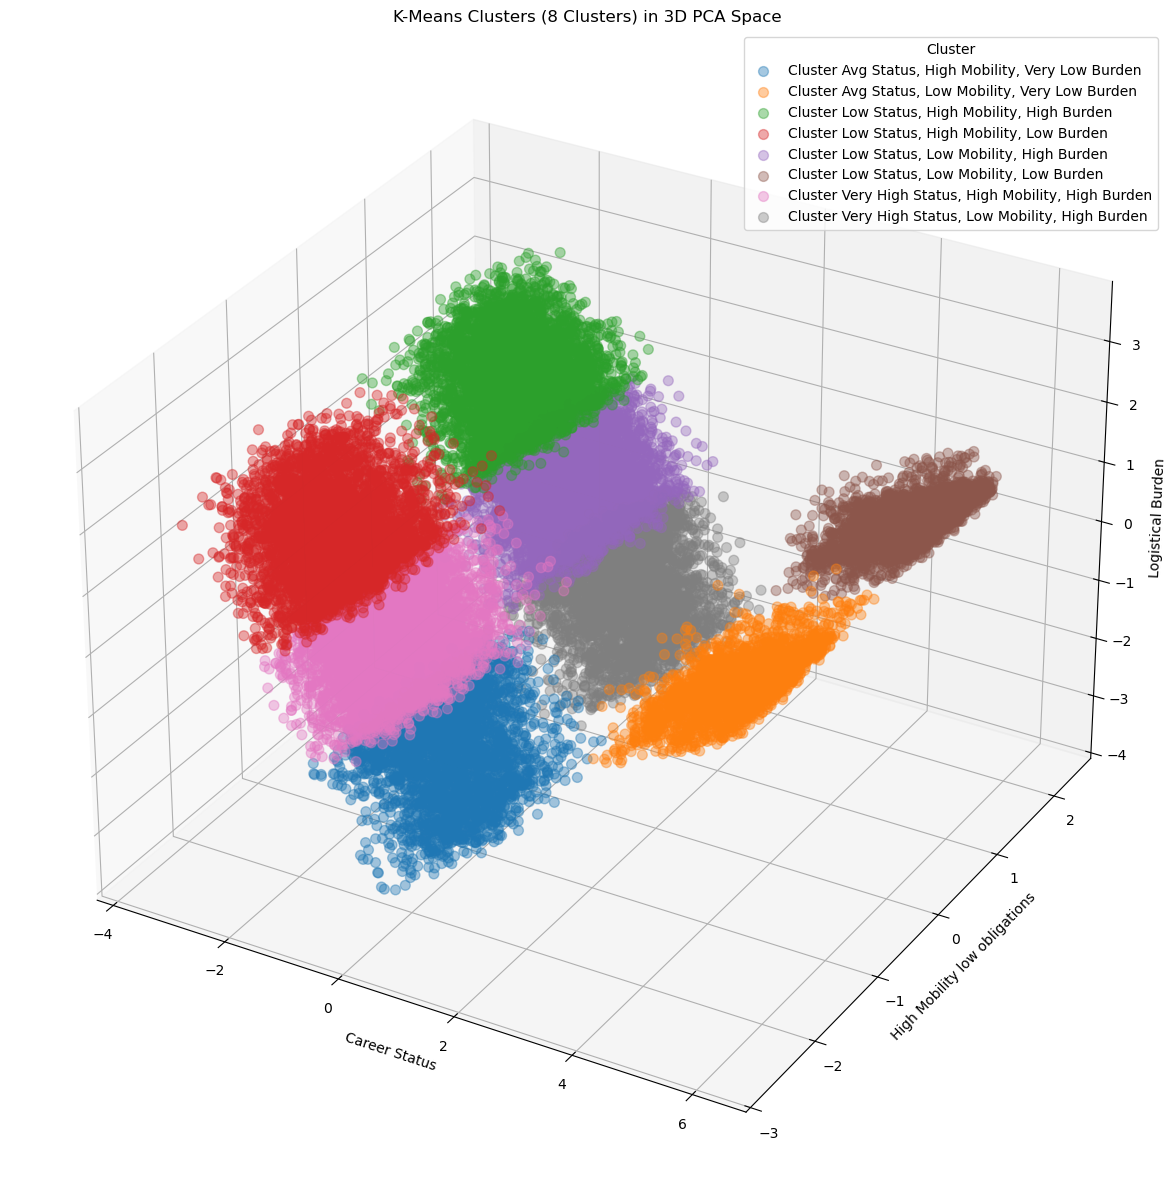

In [26]:
fig = plt.figure(figsize=(20, 15))
    
ax = fig.add_subplot(111, projection='3d')
    
   
for cluster_id in sorted(df_left_Kmeans['Cluster'].unique()):
        subset = df_left_Kmeans[df_left_Kmeans['Cluster'] == cluster_id]
        ax.scatter(
            subset['Career Status'],
            subset['High Mobility low obligations'],
            subset['Logistical Burden'],
            label=f'Cluster {cluster_id}',
            s=50, 
            alpha=0.4 
        )
    
    # 3. Set the labels and title
ax.set_xlabel('Career Status')
ax.set_ylabel('High Mobility low obligations')
ax.set_zlabel('Logistical Burden')
ax.set_title(f'K-Means Clusters ({kmeans.n_clusters} Clusters) in 3D PCA Space')
    
    # 4. Add a legend and display the plot
ax.legend(title='Cluster')
plt.show()

In [27]:
df_left_Kmeans['Cluster'].value_counts()

Cluster
Low Status, Low Mobility, High Burden           5674
Very High Status, High Mobility, High Burden    5078
Low Status, High Mobility, High Burden          4786
Low Status, High Mobility, Low Burden           4260
Very High Status, Low Mobility, High Burden     3758
Avg Status, High Mobility, Very Low Burden      3207
Low Status, Low Mobility, Low Burden            2823
Avg Status, Low Mobility, Very Low Burden       2483
Name: count, dtype: int64

In [28]:
df_left_Kmeans

,Age,BusinessTravel,DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PromotionLethargy,HighDistanceLowPay,WorkLifeCommuteStrain,OverallHappinessScore,Cluster,Career Status,High Mobility low obligations,Logistical Burden
0,-0.731704,1.348752,1.483945,-0.570168,-0.467894,1.454677,1.011826,-0.786273,-0.269868,-0.819438,0.940964,-0.789701,1.352191,1.734162,-0.880118,"Low Status, High Mobility, High Burden",-2.978290,0.831130,1.351455
1,-0.731704,-0.667899,1.346304,-0.570168,-0.601267,-0.295487,1.011826,0.180337,-0.269868,1.220348,-1.062740,-0.789701,2.283577,1.614600,-0.513747,"Low Status, High Mobility, Low Burden",-2.287706,-1.510131,2.061125
2,-0.043792,-0.667899,-0.718315,-0.570168,-0.468216,0.871289,1.011826,-0.786273,-0.269868,-0.819438,0.940964,0.850220,-0.342147,-0.178838,-0.513747,"Very High Status, Low Mobility, High Burden",-0.510354,0.959468,-1.092594
3,-0.158444,-0.667899,1.759227,-0.570168,-0.566719,0.287901,-0.988312,0.180337,-0.269868,-0.819438,0.940964,-0.789701,2.345193,1.973287,-0.880118,"Low Status, High Mobility, High Burden",-2.782551,1.500026,2.459441
4,-0.043792,-0.667899,0.382815,0.230354,-0.184277,0.871289,-0.988312,-0.786273,-0.269868,-0.819438,0.940964,-0.789701,-0.235691,0.777662,-0.147376,"Low Status, Low Mobility, High Burden",-1.063333,1.566025,0.047412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32064,2.249248,1.348752,1.759227,-0.570168,-0.413742,0.871289,-0.988312,-0.786273,-0.269868,-0.819438,0.940964,-0.789701,1.256932,1.973287,1.318109,"Low Status, High Mobility, High Burden",-2.091942,0.633891,2.171001
32065,0.070860,1.348752,-1.957086,0.230354,-0.114537,-0.878875,1.011826,-0.786273,-0.269868,1.220348,-1.062740,0.030259,-1.385453,-1.254901,-0.147376,"Avg Status, High Mobility, Very Low Burden",1.239194,-1.834952,-2.420100
32066,-1.304965,1.348752,0.658098,0.230354,-0.212879,-0.878875,-0.988312,0.180337,-0.269868,-0.819438,0.940964,-0.789701,-0.047552,-0.866322,-0.880118,"Low Status, Low Mobility, High Burden",-0.147202,1.634392,-0.088310
32067,-0.387748,-0.667899,0.245174,-0.570168,-0.456325,-0.295487,-0.988312,0.180337,-0.269868,-0.819438,0.940964,0.850220,0.354487,0.658100,-0.880118,"Low Status, Low Mobility, High Burden",-0.638130,1.592200,0.553632
